<a href="https://colab.research.google.com/github/Dagger77/amzn_recsys/blob/main/eda_notebooks/Amazon_Reviews_2018_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install datasets -q

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##IMPORT

In [ ]:
import os

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [ ]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)

In [ ]:
sns.set(style="white")

##LOAD

In [ ]:
df = pd.read_parquet('/content/drive/MyDrive/Velotix HA/amazon_review_clean.parquet')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510312 entries, 0 to 551158
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   userName     510312 non-null  object        
 1   verified     510312 non-null  bool          
 2   itemName     510312 non-null  object        
 3   description  510312 non-null  object        
 4   brand        510312 non-null  object        
 5   feature      510312 non-null  object        
 6   category     510312 non-null  object        
 7   price        510312 non-null  float64       
 8   rating       510312 non-null  float64       
 9   reviewTime   510312 non-null  datetime64[ns]
 10  summary      510312 non-null  object        
 11  reviewText   510312 non-null  object        
 12  vote         510312 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 51.1+ MB


In [ ]:
memory_usage_bytes = df.memory_usage(deep=True)
total_memory_mb = memory_usage_bytes.sum() / (1024 ** 2)
print(f"Total memory usage: {total_memory_mb:.2f} MB")

Total memory usage: 985.87 MB


In [ ]:
df.head()

,userName,verified,itemName,description,brand,feature,category,price,rating,reviewTime,summary,reviewText,vote
0,Amazon Customer,True,"Toblerone Swiss Milk Chocolate Bar, Crunchy Salted Almond, 3.52 Ounce","Made from deliciously decadent ingredients, Toblerone's swiss milk chocolate is a delight for any chocolate lover. This special bar is packed with crunchy salted caramelized almonds along with Tob...",Toblerone,No record,Prime_Pantry,1.63,5.0,2018-01-01,Five Stars,super smooth and yummy with crunchy bits,0
1,Carla,True,"Prince of Peace Organic Tea, Oolong, 100 Tea Bags","Prince of Peace Enterprises, Inc., founded in 1983, earned its reputation as a leading and diversified company, specializing in the marketing, importing and distribution of gourmet products, bever...",Prince Of Peace,No record,Grocery_and_Gourmet_Food,6.40,5.0,2018-01-01,Five Stars,Perfect for kombucha,0
2,Jaclyn,True,"Pet Champion Adjustable No-Pull Harness, Collar, Leash Matching Bundle Small, Medium, Large Dog","The Pet Champion Large/ Extra Large 22-36 inch Chest Bright Polyester Step-In Halter Dog Harness, Pink Lemonade offers more comfort and less tug while walking. You will have no problem walking the...",Pet Champion,Features Bright Pink Lemonade pattern. Dual D-ring style leash attachment for less tug. Made from 1 inch wide 100% high-grade polyester. Step-In Halter design for easier aplication. Large/ Extra L...,Pet_Supplies,7.99,5.0,2018-01-01,she has an odd shape chest and her pull over harness was not going over her big head so easy anymore. This harness finally adjusted to her size ...,Finally a harness that fits my puppy. I really was in need of a harness that fits my 7 pound pug Chihuahua mix.she has an odd shape chest and her pull over harness was not going over her big head ...,0
3,Christinne M,False,"Koh-I-Noor Progresso Woodless Colored 24-Pencil Set, Assorted Colored Pencils (FA8758.24)","Koh-I-Noor Progresso Woodless Colored 24-Pencil Set, Assorted Colors contains rich, pigmented, solid color encased in lacquer. Five times the color as wood-cased pencils, these woodless pencils fe...",KOH-I-NOOR,"Rich, pigmented, solid color encased in lacquer. Five times the color as wood-cased pencils. Excellent laydown properties for layering and blending without waxy buildup. Create dense, even strokes...",Arts_Crafts_and_Sewing,14.18,5.0,2018-01-01,Loving!!,"I LOVE THEM!! I bought them at Micheals our of curiosity and wanting to try a different colored pencil. I own Crayola, Prisma and Faber Castell. These colored pencils are very pigmented and there ...",0
4,Sandy,True,"Parker Urban Premium Ebony Metal Chiseled, Ballpoint Pen with Medium Black refill (S0911510)",Stunning craftsmanship based on a classic style established in 1921. Ebony black with metallic highlights and a gloss varnish. Enhanced with an asymmetric chiselled pattern that echos urban's ergo...,Parker,Ebony black with metallic highlights and a gloss varnish. Enhanced with an asymmetric chiseled pattern that echo's Urban's ergonomic form. Nib in stainless steel for superior resistance and durabi...,Office_Products,12.99,5.0,2018-01-01,I love this pen,"I love this pen! I love the shape of it, the feel of it, the weight of it, and the color of it. I can highly recommend this pen!",0


##EDA

###rating

Let's start with the target variable that we are going to predict

,rating,count
0,5.0,351057
1,4.0,68045
2,3.0,37833
3,1.0,31558
4,2.0,21819


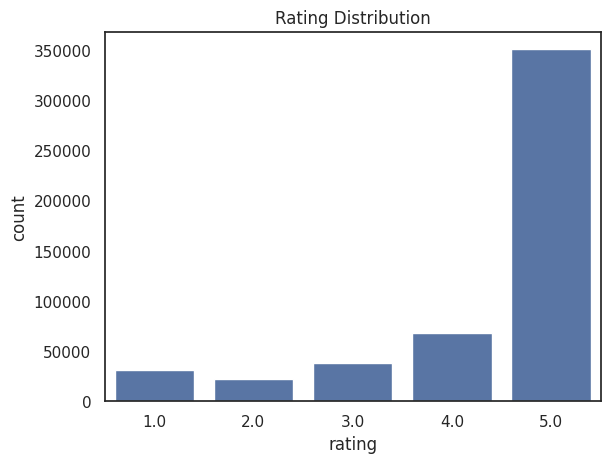

In [ ]:
ratings = pd.DataFrame(df['rating'].value_counts()).reset_index()
display(ratings)
sns.barplot(x='rating', y='count', data=ratings)
plt.title('Rating Distribution')
plt.show()

Very high count of 5-star ratings compared to all other ratings. 5-star ratings dominate the distribution, indicating that customers are generally very satisfied with the products they’ve reviewed.

This kind of distribution is common in customer reviews, where people are more likely to leave a review when they are either very satisfied or very dissatisfied. In this case, it leans more towards satisfaction.

It can lead to a lack of diversity in recommendations, difficulties in product differentiation, and potential biases towards popular items.

###userName

In [ ]:
unique_users = df['userName'].value_counts().reset_index()
unique_users

,userName,count
0,Amazon Customer,32316
1,Kindle Customer,2433
2,Mike,572
3,John,515
4,Michael,424
...,...,...
131161,Sheldon D. Weingust,1
131162,M. Hodapp,1
131163,pjgriff,1
131164,Mfawa Alfred Onen,1


There are two users who have written a significant number of reviews. It's possible that some of these reviews were actually written by anonymous users, which could potentially influence the model.

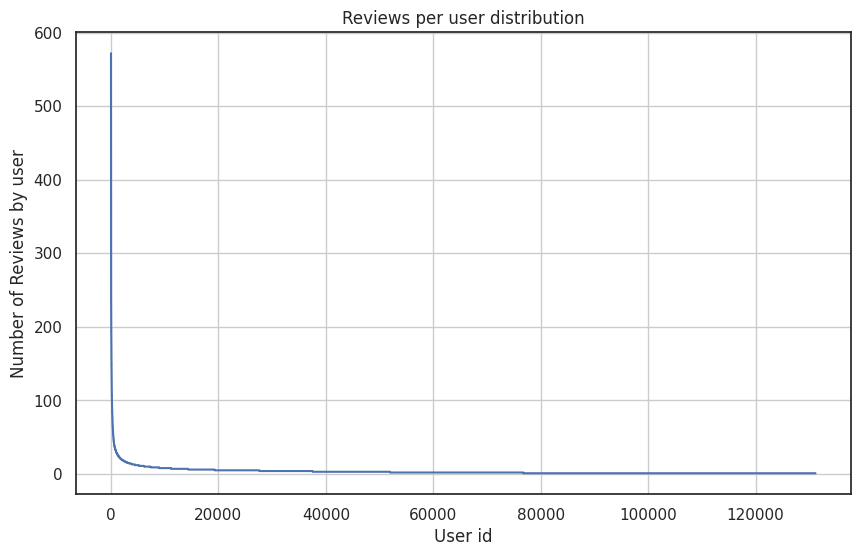

In [ ]:
user_counts = df['userName'].value_counts()[2:].values
plt.figure(figsize=(10, 6))
plt.plot(user_counts)
plt.title('Reviews per user distribution')
plt.xlabel('User id')
plt.ylabel('Number of Reviews by user')
plt.grid(True)
plt.show()

In [ ]:
percentiles = df['userName'].value_counts().quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
percentiles

,count
0.25,1.0
0.50,2.0
0.75,4.0
0.90,7.0
0.95,10.0
0.99,25.0


50% of users have written 2 or fewer reviews, and only 5% of users have written more than 10 reviews. This indicates that the dataset is sparse, with a small fraction of users contributing the majority of the reviews.

In [ ]:
#let's put aside anonymous users and calculate some indicators

user_review_counts = df['userName'].value_counts()[2:]
cumulative_reviews = user_review_counts.cumsum()

print(f'% of Users that wrote 50% of reviews: {len(cumulative_reviews[cumulative_reviews < len(df) * 0.5]) / len (user_review_counts) * 100:.0f}%')
print(f'% of Users that wrote 80% of reviews: {len(cumulative_reviews[cumulative_reviews < len(df) * 0.8]) / len (user_review_counts) * 100:.0f}%')

% of Users that wrote 50% of reviews: 16%
% of Users that wrote 80% of reviews: 54%


A small, highly active subset of users is contributing disproportionately to the review data. If a recommender system overly relies on the data from these users, it might skew recommendations towards the preferences of this small group, potentially overlooking the preferences of the less active majority.

In terms of RecSys:

* Cold Start Problem: For the large portion of users who have written few or no reviews, the system has limited data to understand their preferences, leading to the "cold start" problem. These users may receive less accurate recommendations because the system lacks sufficient information to personalize suggestions for them.

* Bias Toward Active Users:
The recommender system might be biased towards the preferences of the small group of highly active users. This could result in recommendations that cater more to the tastes of these users, potentially ignoring the preferences of the broader, less active user base.
This imbalance in user contribution means that the recommendations might not fully represent the diversity of tastes across all users, leading to a less personalized experience for those who are less active.

<ipython-input-66-19a2be023de5>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_rating_by_bin = df_filtered.groupby('review_count_bin')['rating'].mean()


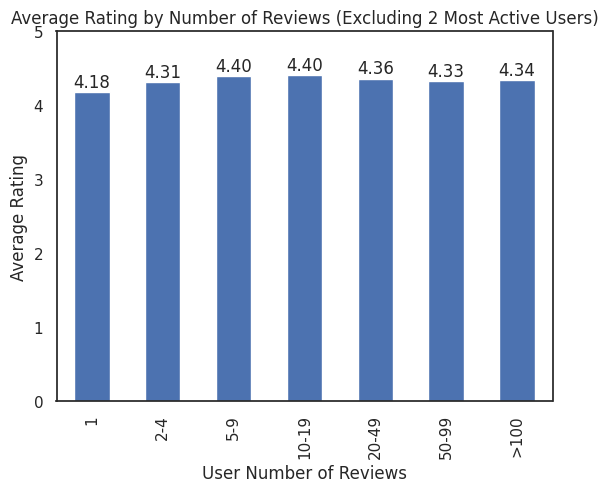

In [ ]:
most_active_users = user_review_counts.head(2).index

df_filtered = df[~df['userName'].isin(most_active_users)]

df_filtered = df_filtered.copy()

df_filtered['user_review_count'] = df_filtered['userName'].map(user_review_counts)

bins = [1, 2, 5, 10, 20, 50, 100, float('inf')]
labels = ['1', '2-4', '5-9', '10-19', '20-49', '50-99', '>100' ] #number of reviews

#Categorize users based on the number of reviews they've written
df_filtered['review_count_bin'] = pd.cut(df_filtered['user_review_count'], bins=bins, labels=labels, right=False)

average_rating_by_bin = df_filtered.groupby('review_count_bin')['rating'].mean()

ax = average_rating_by_bin.plot(kind='bar')
plt.xlabel('User Number of Reviews')
plt.ylabel('Average Rating')
plt.title('Average Rating by Number of Reviews (Excluding 2 Most Active Users)')

for i, v in enumerate(average_rating_by_bin):
    ax.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom')

plt.ylim(0, 5)
plt.show()

Active users who have written 2-20 reviews tend to leave more positive feedback. Users who have written 1 review or more than 20 reviews, left lower ratings.

###verified


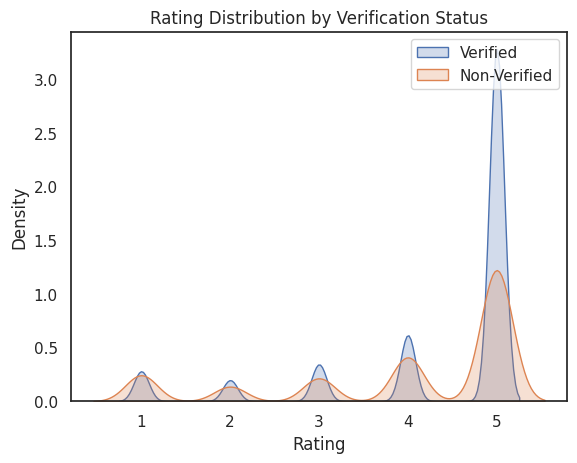

In [ ]:
sns.kdeplot(df[df['verified'] == True]['rating'], label='Verified', fill=True)
sns.kdeplot(df[df['verified'] == False]['rating'], label='Non-Verified', fill=True)
plt.title('Rating Distribution by Verification Status')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.legend()
plt.show()

Rating distributions for verified and unverified users look similar.

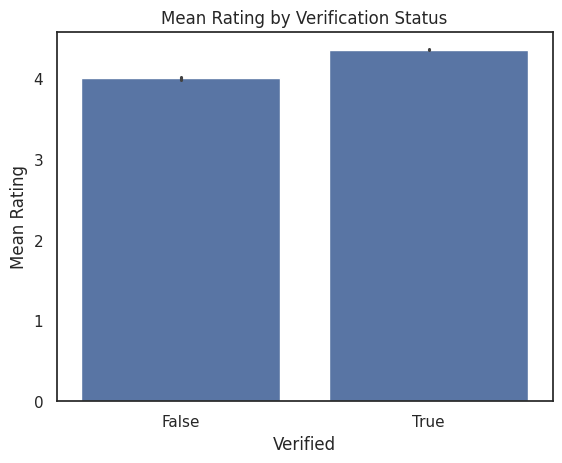

In [ ]:
sns.barplot(x='verified', y='rating', data=df, errorbar=('ci', 95))
plt.title('Mean Rating by Verification Status')
plt.xlabel('Verified')
plt.ylabel('Mean Rating')
plt.show()

The confidence intervals don't overlap. Verified users tend to give higher ratings than non-verified users, and this difference is likely not due to random variability in the data.

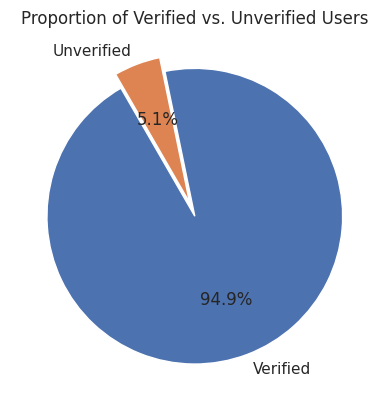

In [ ]:
verified_counts = df['verified'].value_counts()

# Create a pie chart
labels = ['Verified', 'Unverified']
explode = (0, 0.1)

plt.pie(verified_counts, labels=labels, explode=explode, autopct='%1.1f%%', startangle=120)
plt.title('Proportion of Verified vs. Unverified Users')
plt.show()

###itemName

In [ ]:
unique_items = df['itemName'].value_counts().reset_index()
unique_items

,itemName,count
0,Puppia Dog Harnesses,988
1,"KIND Bars, Dark Chocolate Nuts & Sea Salt, Gluten Free, 1.4 Ounce Bars, 12 Count",737
2,"KIND Bars, Caramel Almond and Sea Salt, Gluten Free, 1.4 Ounce Bars, 12 Count",702
3,"Kind Bars, Madagascar Vanilla Almond, Gluten Free, Low Sugar, 1.4oz",664
4,"KIND Bars, Dark Chocolate Chili Almond, Gluten Free, 1.4 Ounce Bars, 12 Count",658
...,...,...
108996,GOLDEN MOON Pet Grass Mat Series PE Artificial Turf Antibacterial Pet Potty Trainer Indoor Outdoor Replacement Pet Grass Mat,1
108997,"Clutch Removal Tool for Husqvarna 340, 345, 346, 350, 351, 353, 445, 455, 460",1
108998,Need for Speed: Shift - PC,1
108999,3d Bling Crystal Cinderella's pumpkin cart stone case for iphone 4/4s best gift for girl,1


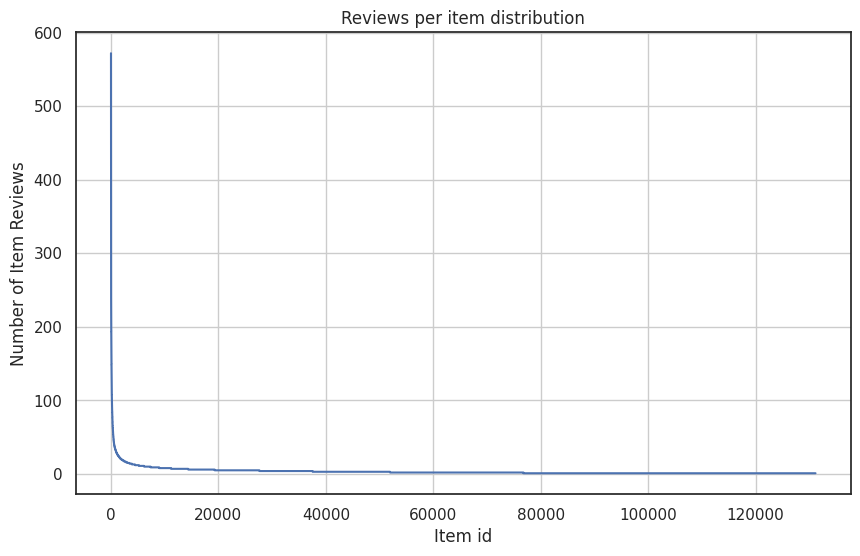

In [ ]:
item_counts = df['itemName'].value_counts().values
plt.figure(figsize=(10, 6))
plt.plot(user_counts)
plt.title('Reviews per item distribution')
plt.xlabel('Item id')
plt.ylabel('Number of Item Reviews')
plt.grid(True)
plt.show()

In [ ]:
percentiles = df['itemName'].value_counts().quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
percentiles

,count
0.25,1.0
0.50,2.0
0.75,4.0
0.90,9.0
0.95,16.0
0.99,46.0


Item interactions distribution looks quite like for the users. 50% of items have less then 2 reviews

In [ ]:
item_review_counts = df['itemName'].value_counts()
cumulative_reviews = item_review_counts.cumsum()
print(f'% of Items reviewed in 50% of reviews: {len(cumulative_reviews[cumulative_reviews < len(df) * 0.5]) / len (item_review_counts) * 100:.0f}%')
print(f'% of Items reviewed in 80% of reviews: {len(cumulative_reviews[cumulative_reviews < len(df) * 0.8]) / len (item_review_counts) * 100:.0f}%')

% of Items reviewed in 50% of reviews: 8%
% of Items reviewed in 80% of reviews: 35%


50% of reviews cover only 8% of items.
The vast majority (80%) of the reviews are still concentrated on just over a third (35%) of the items.

Potential Impact on Modeling:

* Cold Start Problem: For items with few or no reviews, it can be challenging to generate recommendations.

* Bias Toward Popular Items:
The imbalance in the number of reviews across items can lead to models that are biased towards well-reviewed items. This might skew results and reduce the effectiveness of predictions or recommendations for less popular items.

###description

In [ ]:
print("Maximum Length of Description:", df["description"].str.len().max())
print("Minimum Length of Description:", df["description"].str.len().min())
print("Average Length of Description:", df["description"].str.len().mean())
print("Median Length of Description:", df["description"].str.len().median())

Maximum Length of Description: 10675
Minimum Length of Description: 1
Average Length of Description: 681.9748408816567
Median Length of Description: 496.0


In [ ]:
df['desc_length'] = df['description'].apply(len)
df['desc_length'].describe()

,desc_length
count,510312.000000
mean,681.974841
std,699.585184
min,1.000000
25%,207.000000
50%,496.000000
75%,971.000000
max,10675.000000


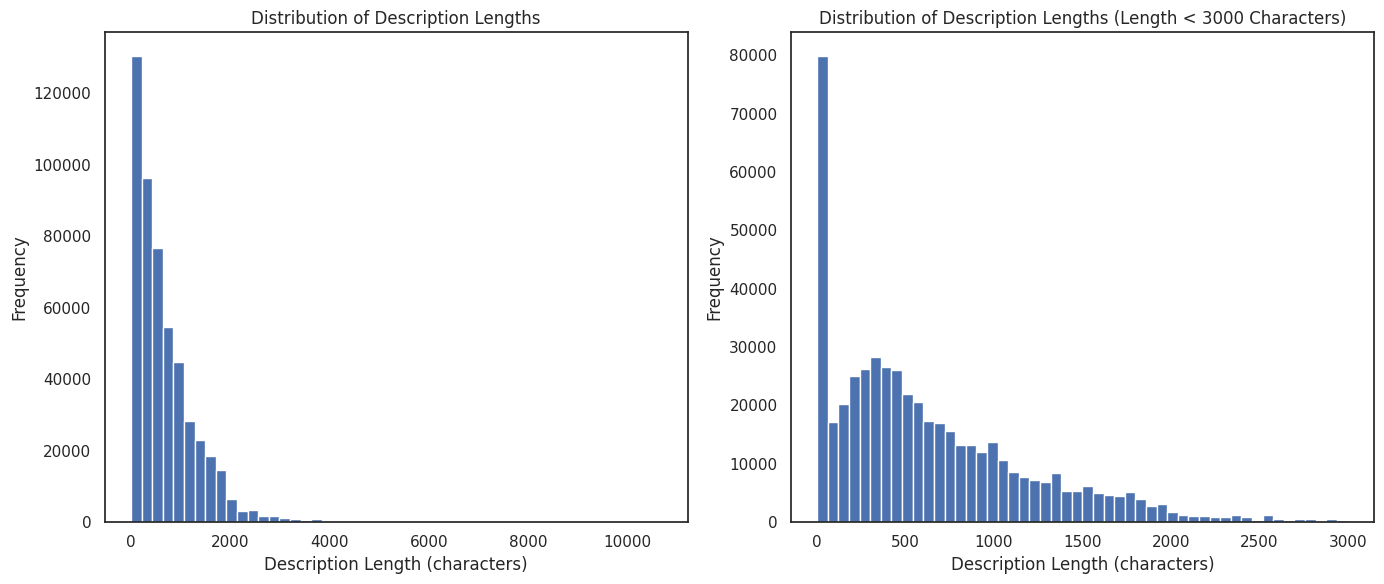

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

df['desc_length'].plot(kind='hist', bins=50, ax=axes[0], title='Distribution of Description Lengths')
axes[0].set_xlabel('Description Length (characters)')
axes[0].set_ylabel('Frequency')

filtered_desc = df[df['desc_length'] <= 3000]

filtered_desc['desc_length'].plot(kind='hist', bins=50, ax=axes[1], title='Distribution of Description Lengths (Length < 3000 Characters)')
axes[1].set_xlabel('Description Length (characters)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Most part of description is shorter 1000 characters

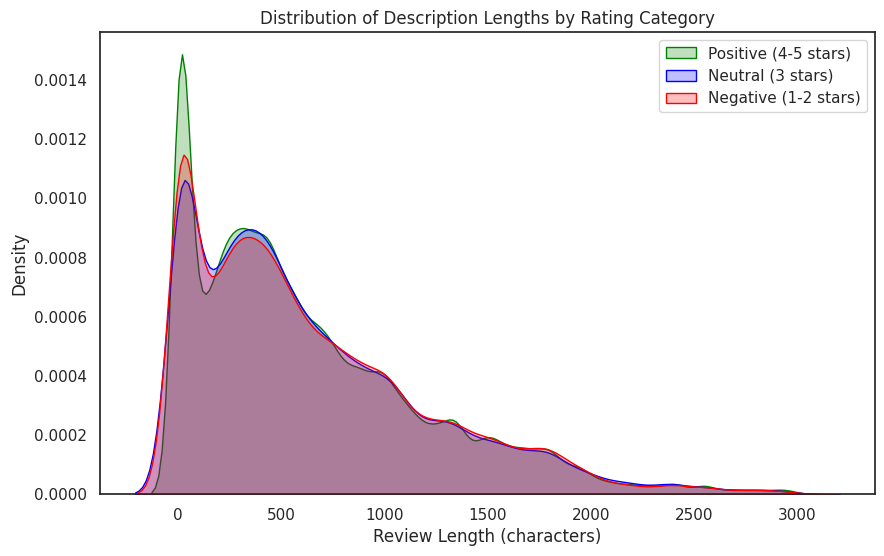

In [ ]:
# Categorize reviews into positive, neutral, and negative
positive_desc = filtered_desc[filtered_desc['rating'].isin([4, 5])]
neutral_desc = filtered_desc[filtered_desc['rating'] == 3]
negative_desc = filtered_desc[filtered_desc['rating'].isin([1, 2])]

plt.figure(figsize=(10, 6))

sns.kdeplot(positive_desc['desc_length'], label='Positive (4-5 stars)', color='green', fill=True)
sns.kdeplot(neutral_desc['desc_length'], label='Neutral (3 stars)', color='blue', fill=True)
sns.kdeplot(negative_desc['desc_length'], label='Negative (1-2 stars)', color='red', fill=True)

plt.title('Distribution of Description Lengths by Rating Category')
plt.xlabel('Review Length (characters)')
plt.ylabel('Density')
plt.legend()
plt.show()

The overall shape of the distributions is quite similar across all rating categories. This suggests that description length alone may not be a strong predictor of rating score, as similar lengths are observed across positive, neutral, and negative reviews.

###brand

In [ ]:
brands = df['brand'].value_counts().reset_index()
brands

,brand,count
0,KONG,5335
1,AmazonBasics,4236
2,No Name,3480
3,KIND,3205
4,OtterBox,3024
...,...,...
24621,PolyBubble,1
24622,Naniwa,1
24623,Prier,1
24624,Eurus-Wings,1


In [ ]:
top_brands_df = brands[brands['count']>=500]
top_brands = top_brands_df.brand.values
print(f'Number of brands having more then 500 reviews: {len(top_brands)}')

Number of brands having more then 500 reviews: 124


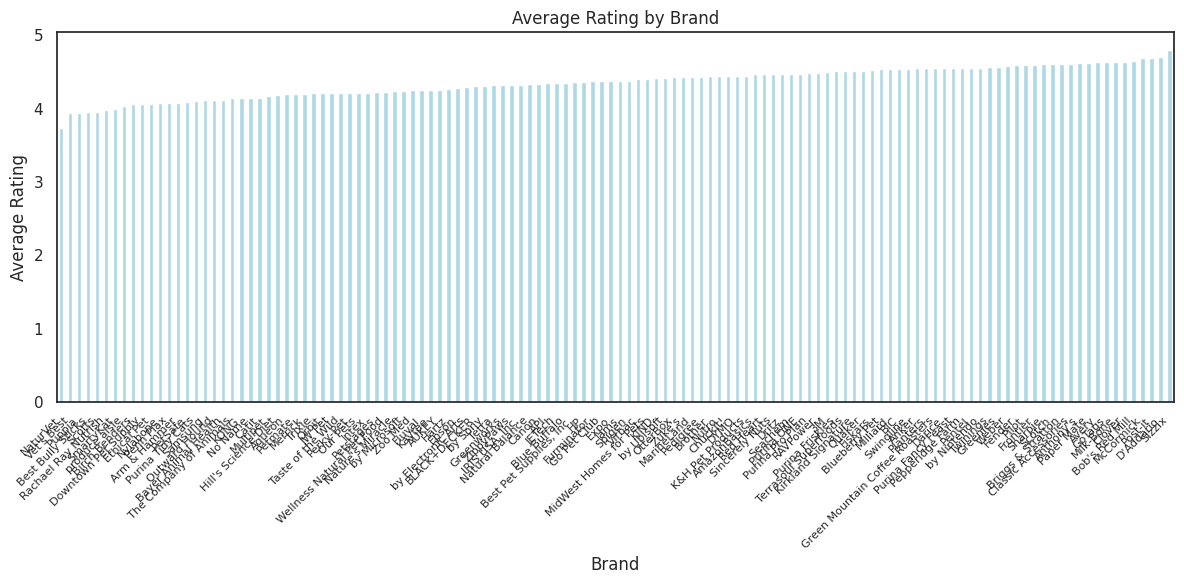

In [ ]:
average_rating_by_brand = df[df.brand.isin(top_brands)].groupby('brand')['rating'].mean().sort_values()

plt.figure(figsize=(12, 6))
ax = average_rating_by_brand.plot(kind='bar', color='lightblue')

plt.title('Average Rating by Brand', fontsize=12)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

For brands having more then 500 reviews we can clearly see the difference in average rating. So brand can be useful as item feature.

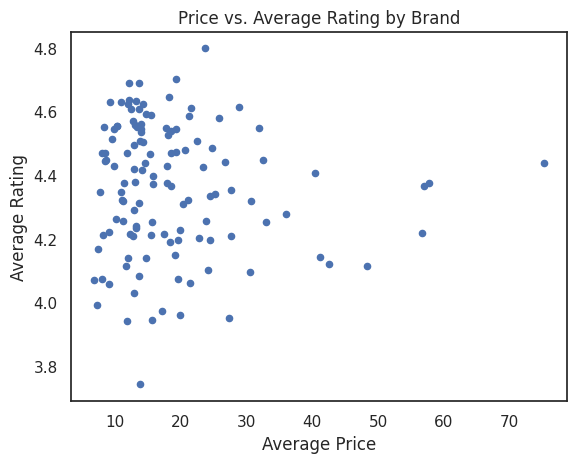

In [ ]:
brand_price_rating = df[df.brand.isin(top_brands)].groupby('brand')[['price', 'rating']].mean()
brand_price_rating.plot(kind='scatter', x='price', y='rating', title='Price vs. Average Rating by Brand')
plt.xlabel('Average Price')
plt.ylabel('Average Rating')
plt.show()

Most of the top brands located in the top left quadrant - low price & good avg rating. There are some interesting outliers.

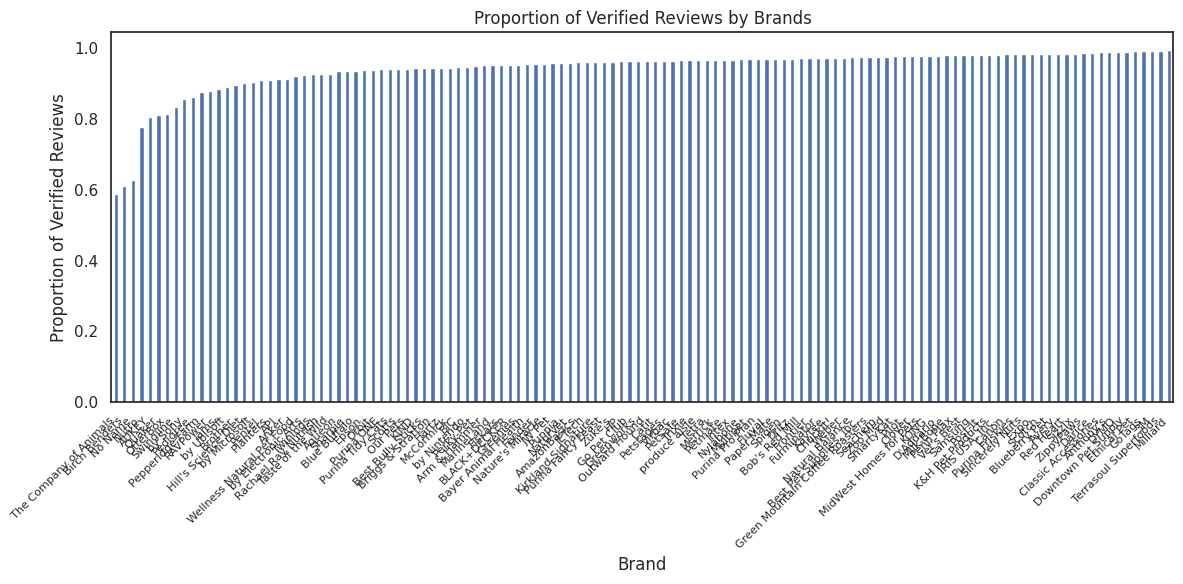

In [ ]:
verified_proportion = df[df.brand.isin(top_brands)].groupby('brand')['verified'].mean().sort_values(ascending=True)

plt.figure(figsize=(12, 6))
verified_proportion.plot(kind='bar', title='Proportion of Verified Reviews by Brands')
plt.xlabel('Brand')
plt.ylabel('Proportion of Verified Reviews')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

We observe that some brands have a lower proportion of verified reviews. However, this may be related to the timing of the reviews. Some reviews for newly launched brands might not have been verified at the time of dataset creation.

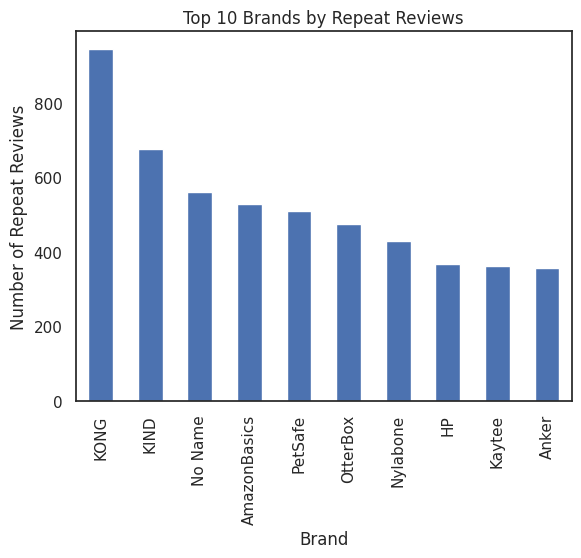

In [ ]:
repeat_reviews = df[df.brand.isin(top_brands)].groupby(['userName', 'brand']).size().reset_index(name='count')
repeat_reviews = repeat_reviews[repeat_reviews['count'] > 1]
repeat_reviews.groupby('brand').size().sort_values(ascending=False).head(10).plot(kind='bar', title='Top 10 Brands by Repeat Reviews')
plt.xlabel('Brand')
plt.ylabel('Number of Repeat Reviews')
plt.show()

In [ ]:
df_kong = df[df['brand'] == 'KONG']
kong_user_review_counts = df_kong['userName'].value_counts()

# Display the top users who have left the most reviews for KONG
top_kong_reviewers = kong_user_review_counts.head(10)
print(top_kong_reviewers)

userName
Amazon Customer      375
Kindle Customer       19
Stephanie             16
Kim                   12
Heather               11
Sarah                 10
Lawrence Pichardo     10
Gwenifer               9
Kandi Anne Brewer      8
Katie                  8
Name: count, dtype: int64


This analysis could be interesting in terms of suspicious "extra" active users writing a lot of reviews for one brand. But not this time.

###category

In [ ]:
df['category'].value_counts()

,count
category,
Pet_Supplies,170375
Grocery_and_Gourmet_Food,95461
Patio_Lawn_and_Garden,62524
Office_Products,55547
Cell_Phones_and_Accessories,41830
Arts_Crafts_and_Sewing,33882
Prime_Pantry,15271
Musical_Instruments,14987
Video_Games,11750


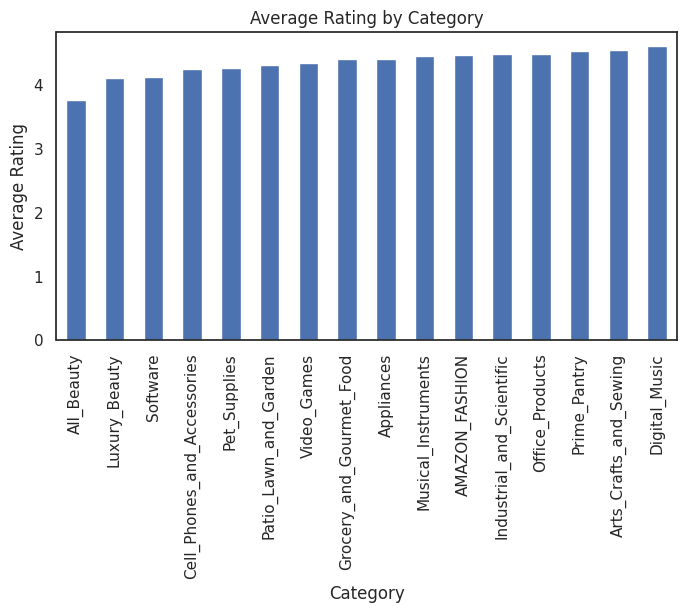

In [ ]:
average_rating_by_category = df.groupby('category')['rating'].mean().sort_values()
average_rating_by_category.plot(kind='bar', title='Average Rating by Category', figsize=(8, 4))
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.show()

We can see that some categories received lower average score

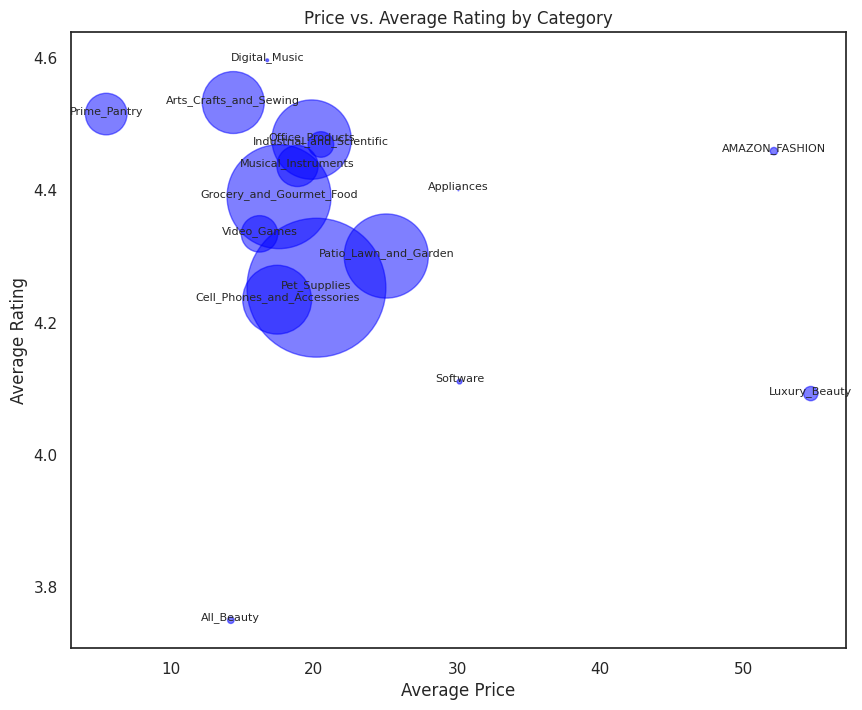

In [ ]:
category_price = df.groupby('category')['price'].mean()
category_rating = df.groupby('category')['rating'].mean()
category_review_count = df.groupby('category').size()

size = category_review_count / category_review_count.max() * 10000

category_stats = pd.DataFrame({
    'price': category_price,
    'rating': category_rating,
    'review_count': category_review_count,
    'size': size
})

# Create the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(category_stats['price'], category_stats['rating'], s=category_stats['size'], color='blue', alpha=0.5)

for i, row in category_stats.iterrows():
    plt.text(row['price'], row['rating'], i, fontsize=8, ha='center')

plt.xlabel('Average Price')
plt.ylabel('Average Rating')
plt.title('Price vs. Average Rating by Category')
plt.show()

It looks like users are not very happy with 'All_Beauty', 'Software', and 'Luxury_Beauty' categories. This categories are not very popular also.

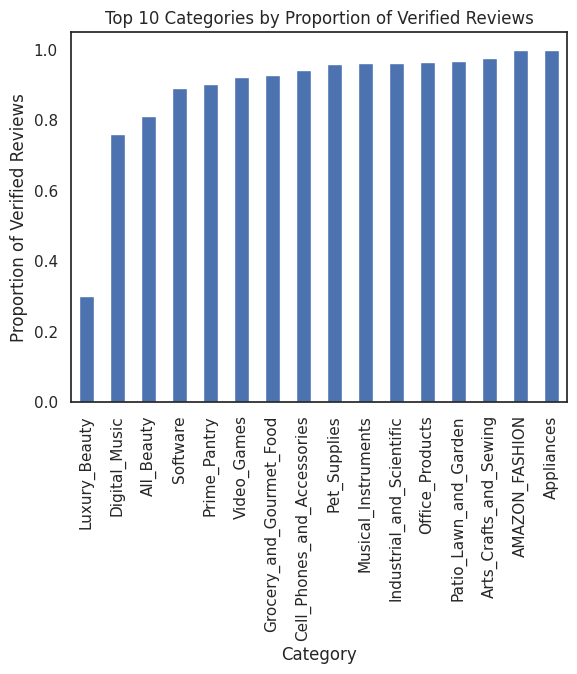

In [ ]:
verified_proportion_category = df.groupby('category')['verified'].mean().sort_values(ascending=True)
verified_proportion_category.plot(kind='bar', title='Top 10 Categories by Proportion of Verified Reviews')
plt.xlabel('Category')
plt.ylabel('Proportion of Verified Reviews')
plt.show()

Suprisingly low proportion of verified reviews for Luxury_Beauty. Maybe at the moment of data extracting it was recently added

###price

In [ ]:
print(f'Minimum observed price: {df.price.min()}')
print(f'Maximum observed price: {df.price.max()}')

Minimum observed price: 0.0
Maximum observed price: 999.99


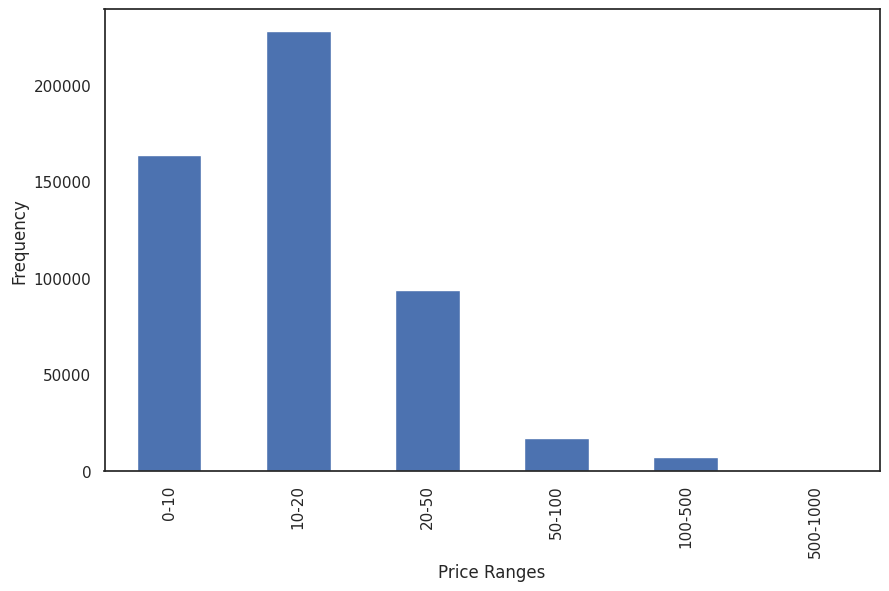

In [ ]:
bins = [0, 10, 20, 50, 100, 500, 1000]
labels = ['0-10', '10-20', '20-50', '50-100', '100-500', '500-1000']

# Cut the price column into the specified bins
df['price_bins'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
df['price_bins'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Price Ranges')
plt.ylabel('Frequency')
plt.show()

The price of biggest part of reviewed items located in 10-50 USD range. Items with the price greater than 50$ get significantly fewer reviews.

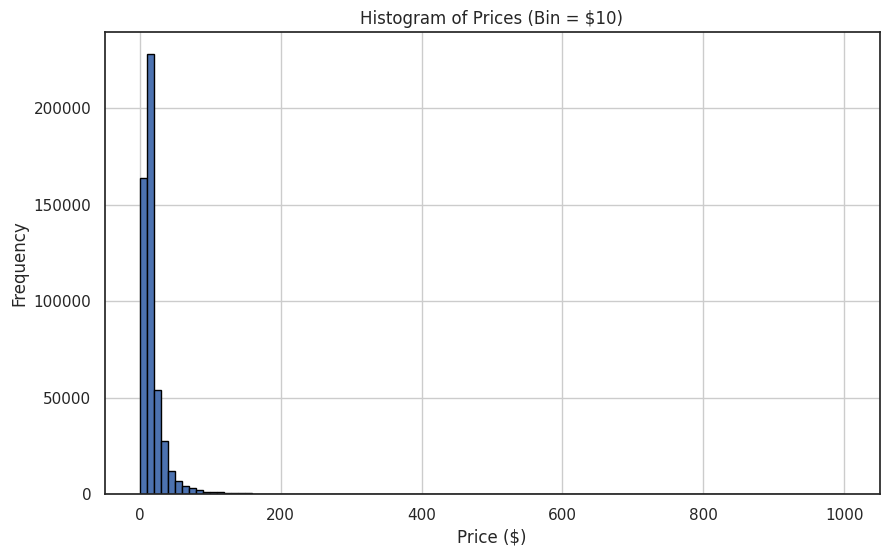

In [ ]:
#Let's see how long is right tail
bin_width = 10
bins = range(int(df['price'].min()), int(df['price'].max()) + bin_width, bin_width)
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=bins, edgecolor='black')
plt.title('Histogram of Prices (Bin = $10)')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

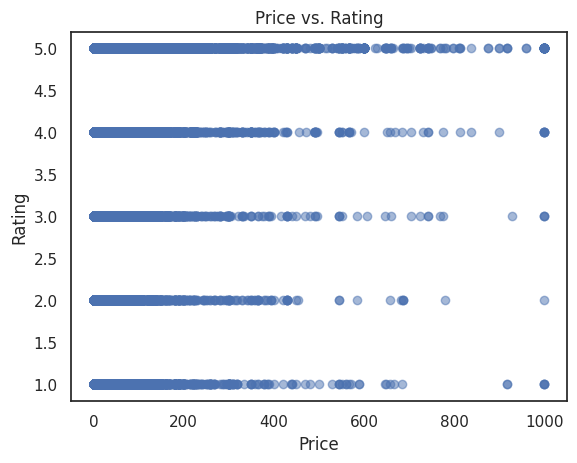

In [ ]:
plt.scatter(df['price'], df['rating'], alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Price vs. Rating')
plt.show()

There is a noticeable decrease in the density of data points as the price increases, indicating that fewer products are priced at the higher end.

As the price increases, the ratings appear to cluster more tightly around 4.0 and 5.0, though there are fewer data points. This might suggest that high-priced products tend to have higher ratings, or it could reflect that fewer high-priced products are reviewed, potentially by more satisfied customers.

There doesn’t appear to be a strong correlation between price and rating. Products at all price points receive a wide range of ratings, though higher ratings seem more frequent overall.

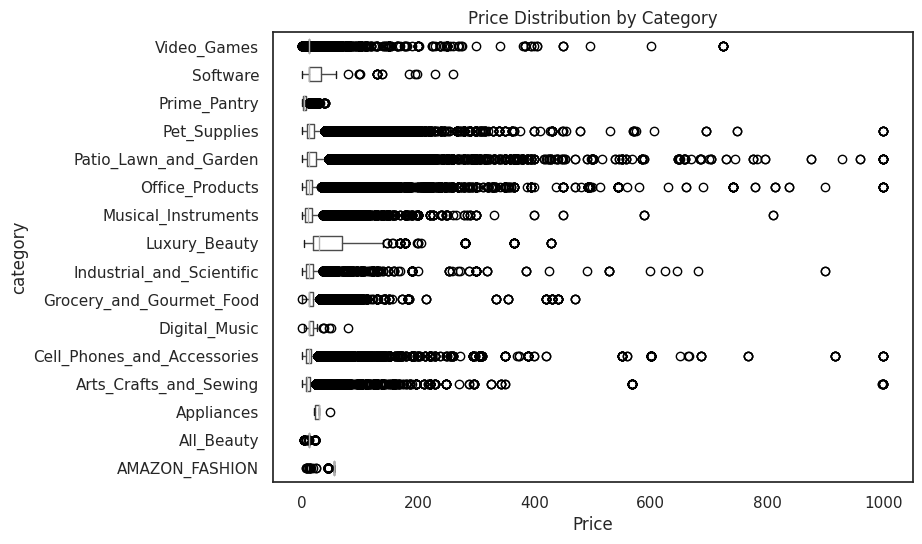

In [ ]:
df.boxplot(column='price', by='category', grid=False, vert=False, figsize=(8, 6))
plt.xlabel('Price')
plt.title('Price Distribution by Category')
plt.suptitle('')
plt.show()

In [ ]:
price_1_perc = df['price'].quantile(0.01)
price_99_perc = df['price'].quantile(0.99)

print(f"1st Percentile of Price: {price_1_perc}")
print(f"99th Percentile of Price: {price_99_perc}")

1st Percentile of Price: 1.86
99th Percentile of Price: 128.98


All the items with the price higher then 130USD are outliers

###reviewTime

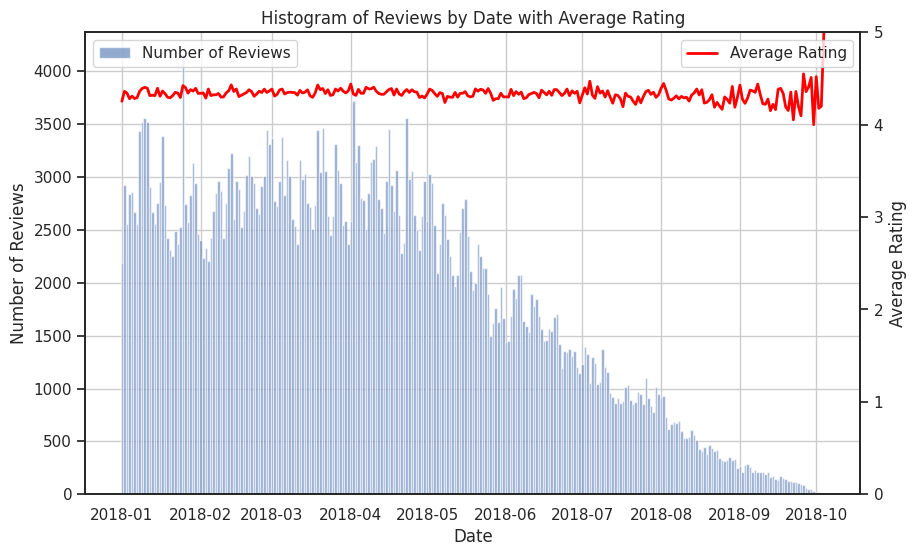

In [ ]:
date_freq = pd.DataFrame(df['reviewTime'].value_counts()).reset_index()
date_freq.columns = ['Date', 'Frequency']
date_freq = date_freq.sort_values('Date')

average_rating_by_date = df.groupby('reviewTime')['rating'].mean()

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(date_freq['Date'], date_freq['Frequency'], width=1.0, alpha=0.6, label='Number of Reviews')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Reviews')
ax1.set_title('Histogram of Reviews by Date with Average Rating')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(average_rating_by_date.index, average_rating_by_date, color='red', label='Average Rating', linewidth=2)
ax2.set_ylabel('Average Rating')
ax2.set_ylim(0, 5)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

Something happend in the second part of the year. That lead us to the idea not to do timesplit for the modeling, since the number of interactions in the test would be extremely low

###summary      

Is not quite interesting, since it seems to be the summary of the review text/ But we can user it to create sentiment feature.


###reviewText

In [ ]:
print("Maximum Length of Review:", df["reviewText"].str.len().max())
print("Minimum Length of Review:", df["reviewText"].str.len().min())
print("Average Length of Review:", df["reviewText"].str.len().mean())
print("Median Length of Review:", df["reviewText"].str.len().median())

Maximum Length of Review: 29323
Minimum Length of Review: 0
Average Length of Review: 166.34013309504775
Median Length of Review: 81.0


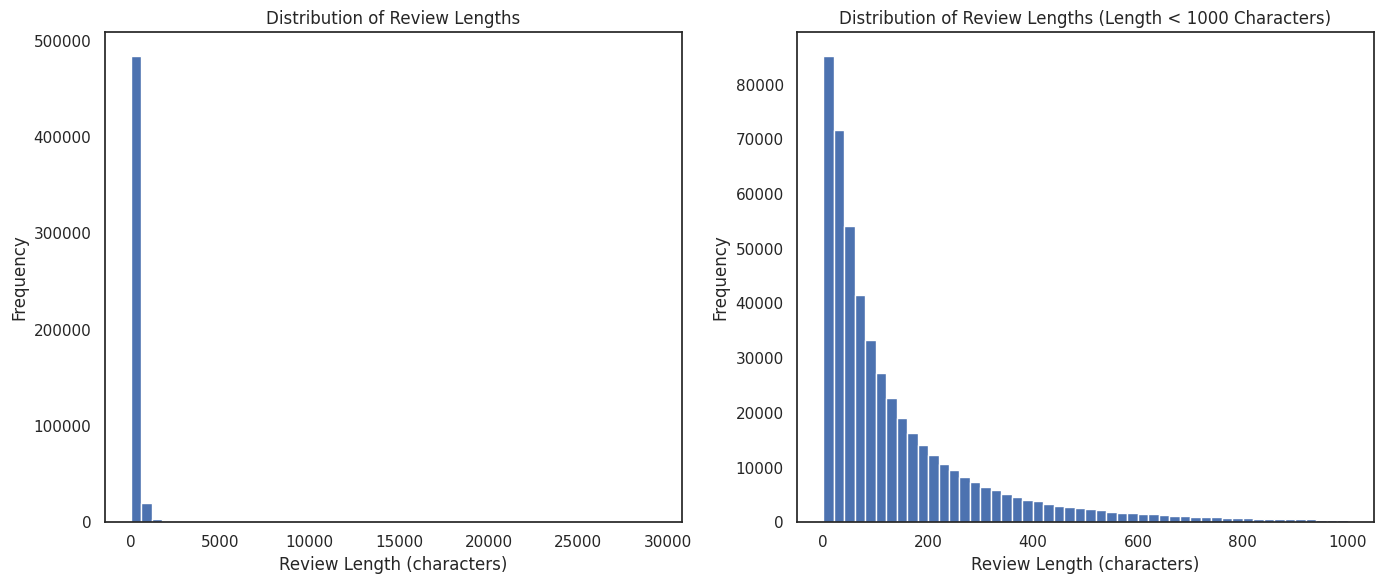

In [ ]:
df['review_length'] = df['reviewText'].apply(len)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

df['review_length'].plot(kind='hist', bins=50, ax=axes[0], title='Distribution of Review Lengths')
axes[0].set_xlabel('Review Length (characters)')
axes[0].set_ylabel('Frequency')

filtered_reviews = df[df['review_length'] <= 1000]

filtered_reviews['review_length'].plot(kind='hist', bins=50, ax=axes[1], title='Distribution of Review Lengths (Length < 1000 Characters)')
axes[1].set_xlabel('Review Length (characters)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
print(f'Total number of reviews: {len(df)}')
print(f'Number of reviews with length > 1000: {len(df[df["review_length"] > 1000])}')
print(f'Share of long reviews: {(len(df[df["review_length"] > 1000])/len(df)*100):.2f}%')

Total number of reviews: 510312
Number of reviews with length > 1000: 8408
Share of long reviews: 1.65%


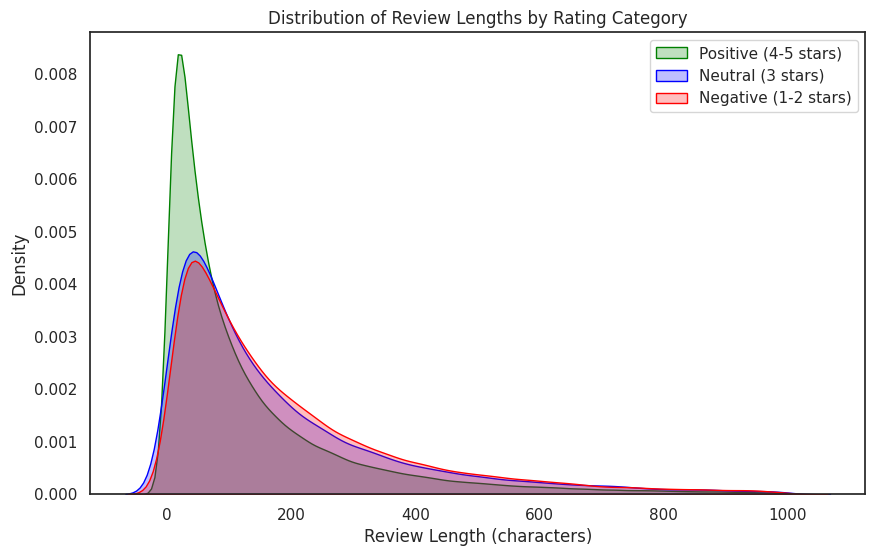

In [ ]:
# Categorize reviews into positive, neutral, and negative
positive_reviews = filtered_reviews[filtered_reviews['rating'].isin([4, 5])]
neutral_reviews = filtered_reviews[filtered_reviews['rating'] == 3]
negative_reviews = filtered_reviews[filtered_reviews['rating'].isin([1, 2])]

plt.figure(figsize=(10, 6))

sns.kdeplot(positive_reviews['review_length'], label='Positive (4-5 stars)', color='green', fill=True)
sns.kdeplot(neutral_reviews['review_length'], label='Neutral (3 stars)', color='blue', fill=True)
sns.kdeplot(negative_reviews['review_length'], label='Negative (1-2 stars)', color='red', fill=True)

plt.title('Distribution of Review Lengths by Rating Category')
plt.xlabel('Review Length (characters)')
plt.ylabel('Density')
plt.legend()
plt.show()

Postitive reviews a shorter in general then neutral and negative ones.
Both neutral and negative reviews appear to have fatter right tails, indicating that these reviews are often longer.

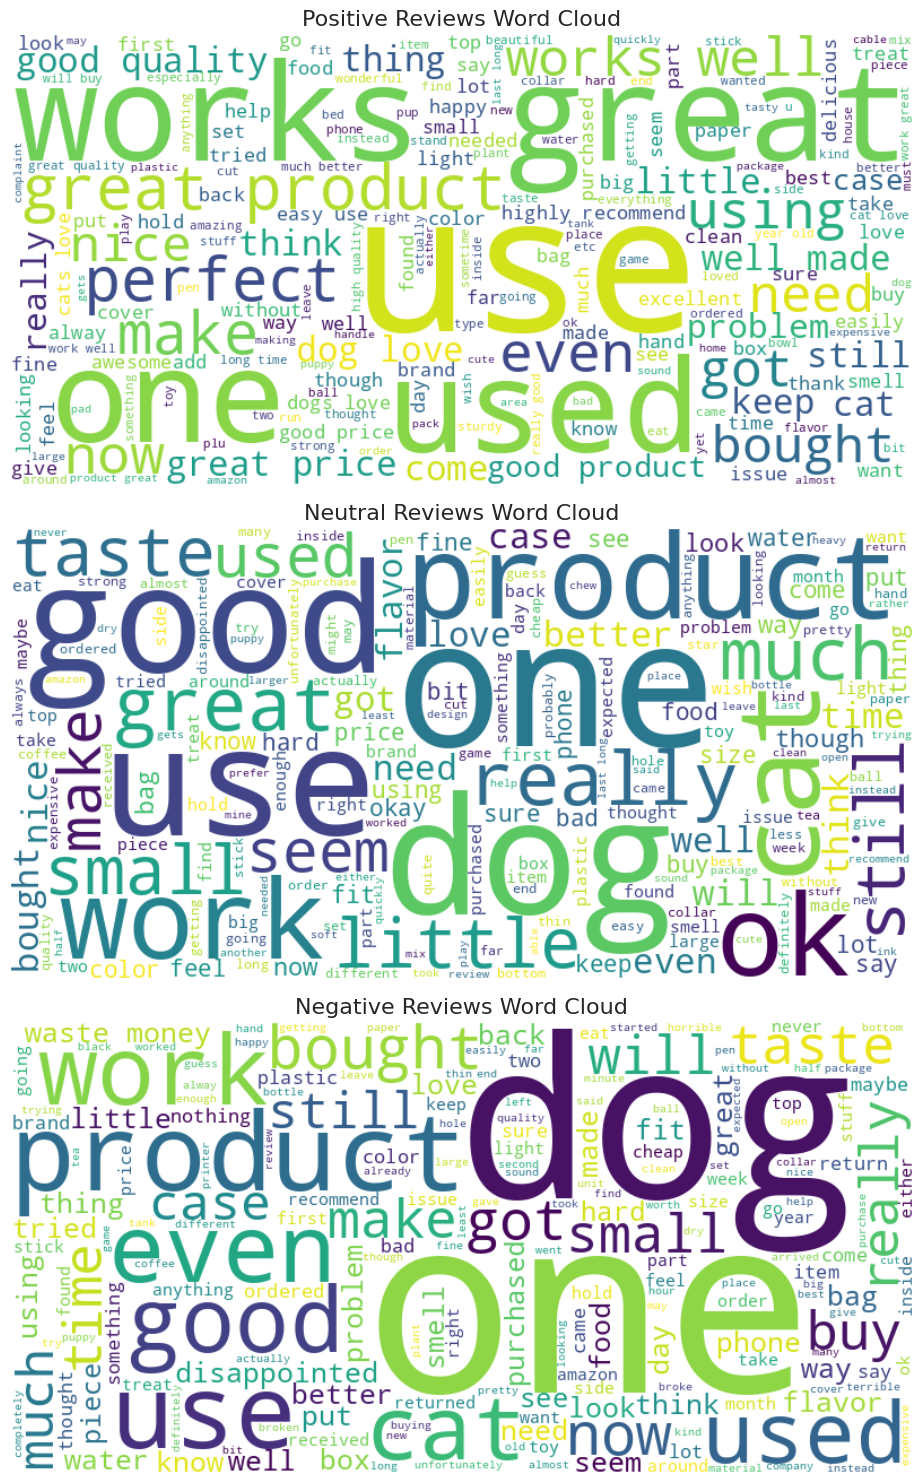

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stop_words = set(STOPWORDS)


def preprocess_reviews(reviews):
    reviews = reviews.str.lower()
    reviews = reviews.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
    return reviews.tolist()

positive_reviews_text = preprocess_reviews(positive_reviews['reviewText'])
neutral_reviews_text = preprocess_reviews(neutral_reviews['reviewText'])
negative_reviews_text = preprocess_reviews(negative_reviews['reviewText'])

def generate_word_cloud(text, title, ax):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(title, fontsize=16)
    ax.axis('off')

# Create a figure with 3 subplots arranged vertically
fig, axes = plt.subplots(3, 1, figsize=(20, 15))

generate_word_cloud(positive_reviews_text, 'Positive Reviews Word Cloud', axes[0])
generate_word_cloud(neutral_reviews_text, 'Neutral Reviews Word Cloud', axes[1])
generate_word_cloud(negative_reviews_text, 'Negative Reviews Word Cloud', axes[2])

plt.tight_layout()
plt.show()

###vote

In [ ]:
print(f'Percentage of reviews having vote {len(df[df["vote"] > 0]) / len(df) * 100:.2f}%')

Percentage of reviews having vote 2.97%


Vote feature doesn't seem to be useful

In [ ]:
#temporary columns drop
columns_to_drop = ['price_bins', 'review_length', 'desc_length']
df = df.drop(columns=columns_to_drop)

##CONCLUSION

Our dataset, characteristic of e-commerce environments, is sparse, with 510,312 known interactions between 131,166 unique users and 109,001 unique items. These items are distributed across 24,626 brands and 16 categories.

**Key Observations:**

* Price Range:

The prices of items are primarily concentrated within the 10-50USD range, indicating that most products fall within a mid-tier pricing bracket.
* User/Item Interactions:

Interactions between users and items are accompanied by explicit ratings, providing direct feedback on user satisfaction.
* Time Period:

The data spans from January to October 2018. However, there is a noticeable and significant drop in interactions during the second half of the year, which could affect the temporal analysis.
* Features:

The dataset lacks specific user features. We can use brand, category, description, price, and summary item features. These can be leveraged to enhance recommendation models.

**Suggestions:**

- Temporal Split Considerations:

Due to the drop in interactions in the latter half of the year, it might be prudent to avoid a simple chronological split when preparing data for modeling. Alternative strategies like stratified or random splits could ensure a more balanced distribution of interactions.

- Feature Engineering:

Given the lack of user features, emphasis should be placed on extracting meaningful insights from the item features.